In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr


/var/folders/8w/zjcc1zn533s5xzkvtz1pfhl80000gn/T/ipykernel_79346/1933662026.py:15: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
red = pd.read_csv('../data/wine+quality/winequality-red.csv', delimiter=';')
white = pd.read_csv('../data/wine+quality/winequality-white.csv', delimiter=';')

red['color_code'] = 0
white['color_code'] = 1
data = pd.concat([red, white])


# how many principal component?

In [3]:
feat_ls = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

## white wine

9 components

In [4]:
scale= StandardScaler()
# standardization of dependent variables
scaled_data = scale.fit_transform(white[feat_ls])


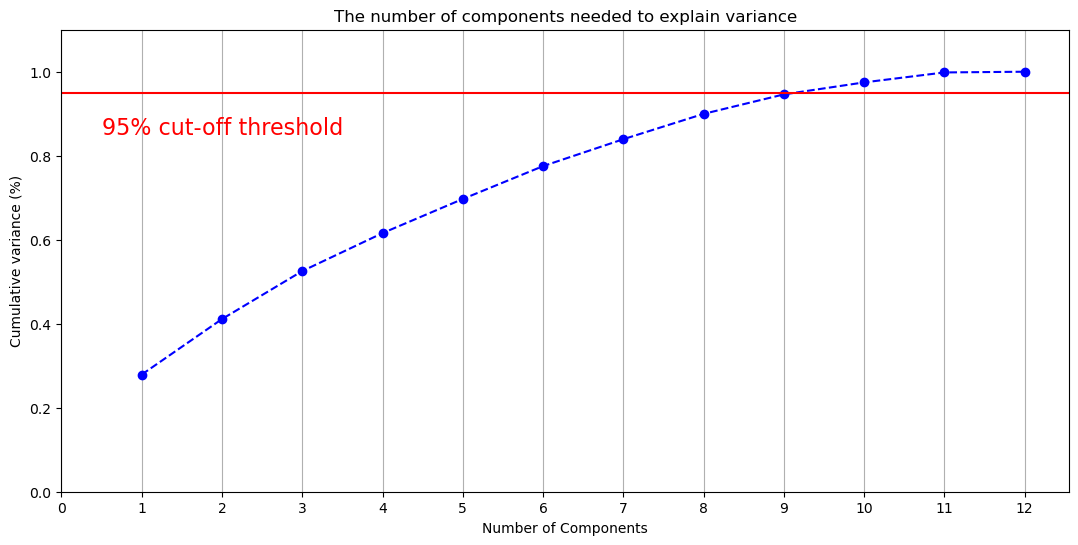

In [6]:
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (13,6)

fig, ax = plt.subplots()
xi = np.arange(1, scaled_data.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, scaled_data.shape[1]+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


## red wine

9 components

In [7]:
scale= StandardScaler()
# standardization of dependent variables
scaled_data = scale.fit_transform(red[feat_ls])


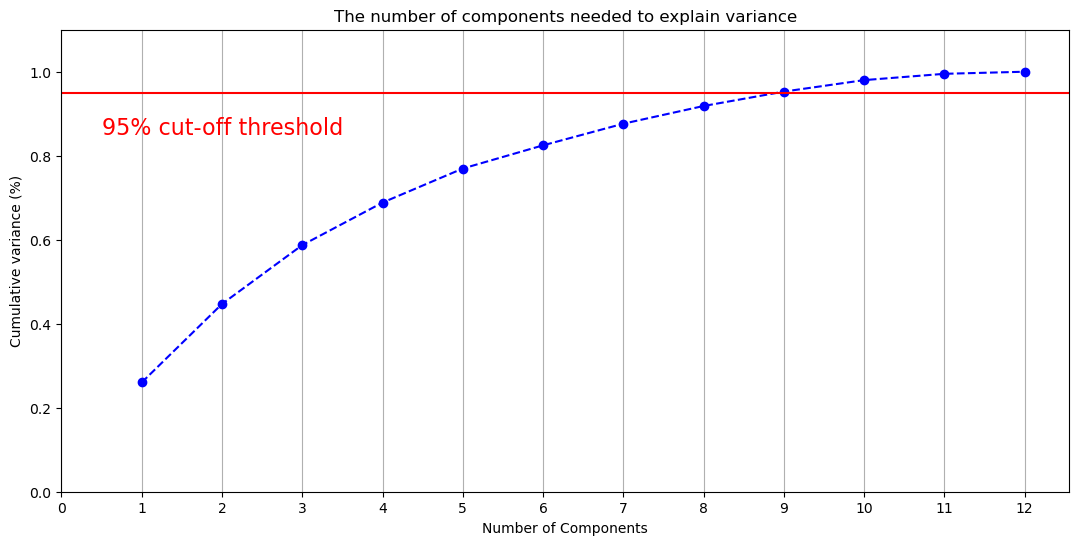

In [9]:
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (13,6)

fig, ax = plt.subplots()
xi = np.arange(1, scaled_data.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, scaled_data.shape[1]+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


## How many clusters

## red wine

2 clusters

In [10]:
scale= StandardScaler()
scaled_data = scale.fit_transform(red[feat_ls])

pca = PCA(n_components=9, random_state=314)
pca_data = pca.fit_transform(scaled_data)


In [11]:
sum_of_squared_d = []

for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km = km.fit(pca_data)
    sum_of_squared_d.append(km.inertia_)

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

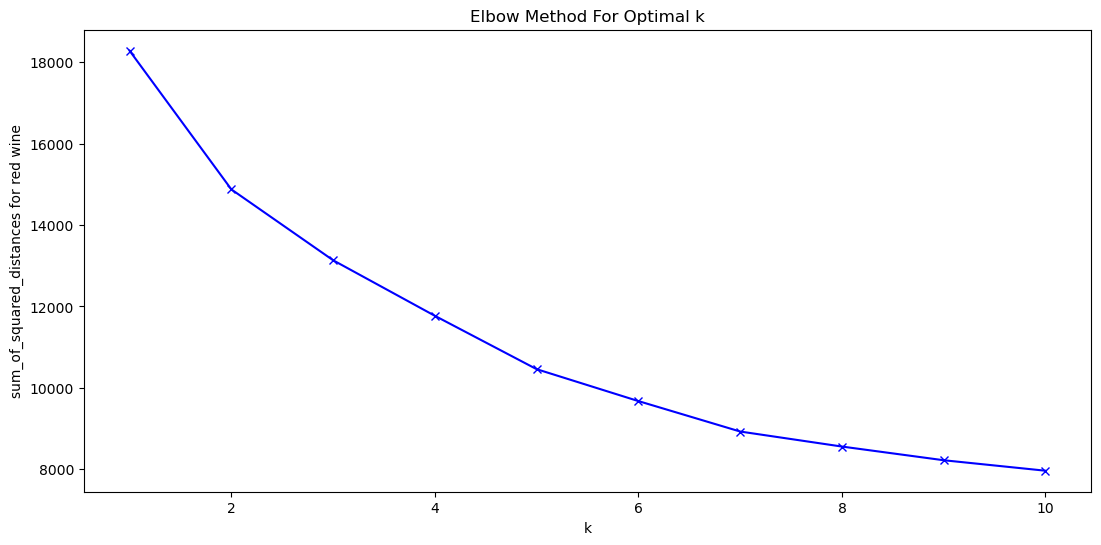

In [12]:
plt.plot(range(1, 11), sum_of_squared_d, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances for red wine')
plt.title('Elbow Method For Optimal k')
plt.show()

## white wine

2 cluster

In [13]:
scale= StandardScaler()
scaled_data = scale.fit_transform(white[feat_ls])

pca = PCA(n_components=9, random_state=314)
pca_data = pca.fit_transform(scaled_data)

In [14]:
sum_of_squared_d = []

for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km = km.fit(pca_data)
    sum_of_squared_d.append(km.inertia_)

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

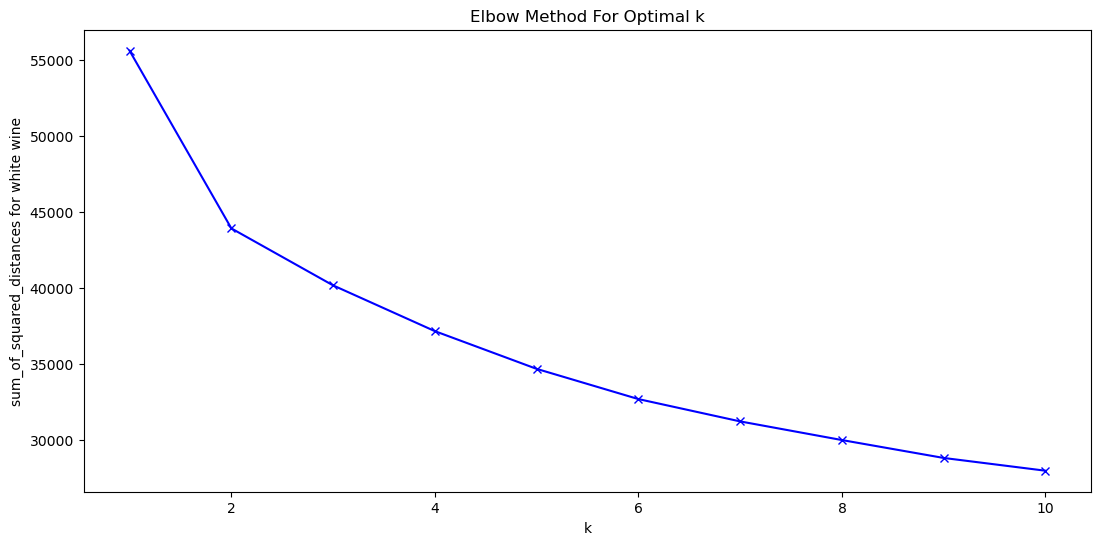

In [15]:
plt.plot(range(1, 11), sum_of_squared_d, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances for white wine')
plt.title('Elbow Method For Optimal k')
plt.show()

## all data

3 clusters! it is able to merge merge one cluster from red with one cluster from white

In [16]:
scale= StandardScaler()
scaled_data = scale.fit_transform(data[feat_ls])

pca = PCA(n_components=9, random_state=314)
pca_data = pca.fit_transform(scaled_data)

In [17]:
sum_of_squared_d = []

for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km = km.fit(pca_data)
    sum_of_squared_d.append(km.inertia_)

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

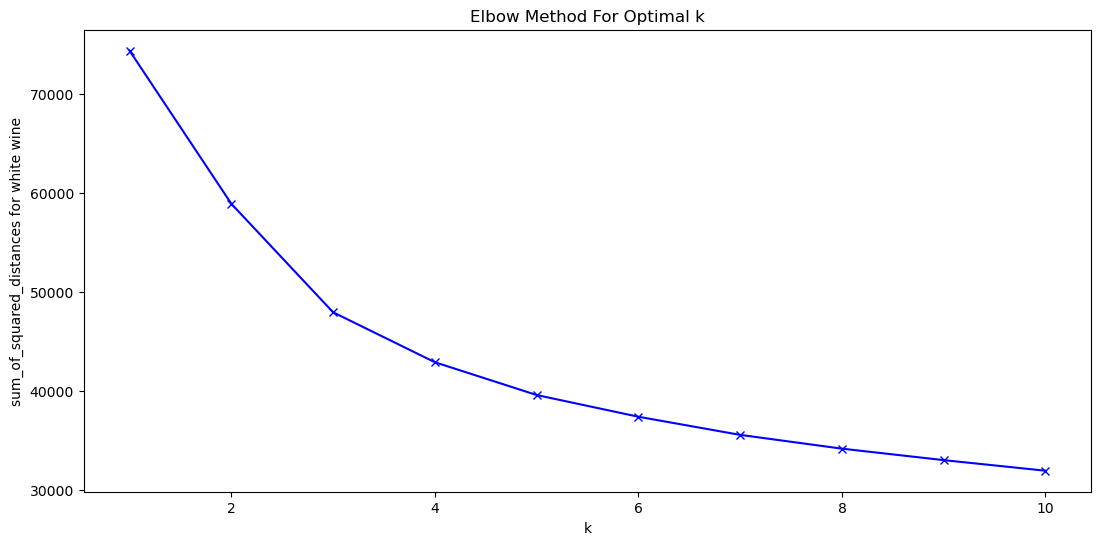

In [18]:
plt.plot(range(1, 11), sum_of_squared_d, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances for white wine')
plt.title('Elbow Method For Optimal k')
plt.show()

# Modeling: 
# white wine --> PCA(9) --> K-Means (2 clusters)
# red wine --> PCA(9) --> K-Means (2 clusters)

In [19]:
scale= StandardScaler()
scaled_data = scale.fit_transform(red[feat_ls])

pca = PCA(n_components=9, random_state=314)
pca_data = pca.fit_transform(scaled_data)

km = KMeans(n_clusters=2, random_state=314)
red['cluster'] = km.fit_predict(pca_data)

/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
scale = StandardScaler()
scaled_data = scale.fit_transform(white[feat_ls])

pca = PCA(n_components=9, random_state=314)
pca_data = pca.fit_transform(scaled_data)

km = KMeans(n_clusters=2, random_state=314)
white['cluster'] = km.fit_predict(pca_data)
white['cluster'] = white.cluster.apply(lambda v: 2 if v==0 else 3)


/Users/shuijingzhang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
red.to_csv('../data/red_pca_kmeans_pred.csv', index = False)
white.to_csv('../data/white_pca_kmeans_pred.csv', index = False)
